# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('./data/data_wrangling.csv')

In [3]:
# Checking the loaded file
pd.set_option('display.max_columns', len(df.columns))
df.head()

,price,log_price,bedrooms,review_scores_rating,review_scores_checkin,bathrooms_text,reviews_per_month,has_availability,availability_365,latitude,host_response_time,host_is_superhost,review_scores_accuracy,number_of_reviews_ltm,minimum_nights,longitude,availability_60,availability_30,neighbourhood_cleansed,maximum_nights,property_type,review_scores_cleanliness,accommodates,beds,review_scores_value,instant_bookable,availability_90,room_type
0,469.0,6.150603,5.0,100.0,10.0,11,0.10,True,0,43.64590,1,False,10.0,0,28,-79.42423,0,0,71,730,14,10.0,10,7.0,10.0,False,0,0
1,94.0,4.543295,1.0,97.0,10.0,5,1.19,True,365,43.64080,0,False,10.0,0,180,-79.37673,60,30,122,365,21,10.0,2,1.0,10.0,True,90,2
2,72.0,4.276666,1.0,95.0,10.0,4,1.64,True,365,43.69805,1,False,10.0,0,28,-79.45411,60,30,15,28,36,10.0,3,1.0,10.0,True,90,2
3,100.0,4.605170,2.0,93.0,10.0,2,0.86,True,283,43.63539,4,False,9.0,2,30,-79.44010,0,0,109,365,14,9.0,5,2.0,9.0,False,8,0
4,93.0,4.532599,2.0,99.0,10.0,3,0.60,True,363,43.74922,3,False,10.0,1,2,-79.29188,58,28,128,60,24,10.0,4,2.0,10.0,False,88,2


In [4]:
# Checking the information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      10799 non-null  float64
 1   log_price                  10799 non-null  float64
 2   bedrooms                   10799 non-null  float64
 3   review_scores_rating       10799 non-null  float64
 4   review_scores_checkin      10799 non-null  float64
 5   bathrooms_text             10799 non-null  int64  
 6   reviews_per_month          10799 non-null  float64
 7   has_availability           10799 non-null  bool   
 8   availability_365           10799 non-null  int64  
 9   latitude                   10799 non-null  float64
 10  host_response_time         10799 non-null  int64  
 11  host_is_superhost          10799 non-null  bool   
 12  review_scores_accuracy     10799 non-null  float64
 13  number_of_reviews_ltm      10799 non-null  int

There are total 28 columns in the dataframe. Out of 28 columns 3 columns are bool type, 12 are float type and 13 are int type.

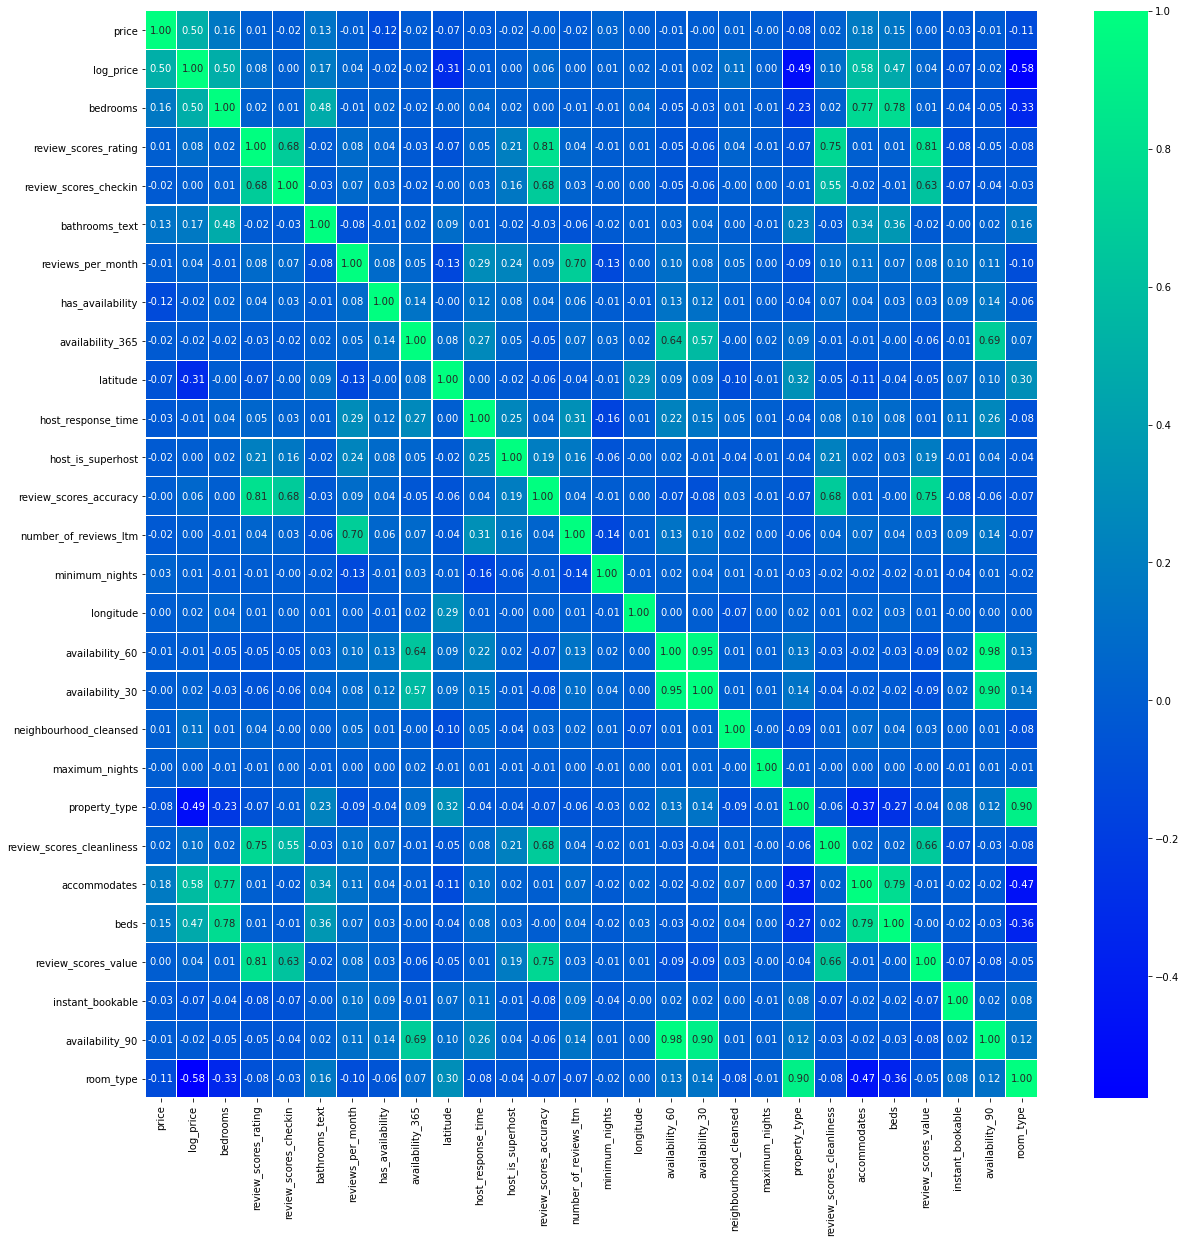

In [5]:
dfcorr = df.corr()
fig,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(dfcorr, annot= True,fmt = '.2f', lw = 0.2, cmap = 'winter')

In [6]:
df.describe()

,price,log_price,bedrooms,review_scores_rating,review_scores_checkin,bathrooms_text,reviews_per_month,availability_365,latitude,host_response_time,review_scores_accuracy,number_of_reviews_ltm,minimum_nights,longitude,availability_60,availability_30,neighbourhood_cleansed,maximum_nights,property_type,review_scores_cleanliness,accommodates,beds,review_scores_value,availability_90,room_type
count,10799.000000,10799.000000,10799.000000,10799.000000,10799.00000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,1.079900e+04,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000
mean,141.944717,4.587674,1.423373,94.338828,9.74118,3.817946,1.028144,132.810723,43.681350,2.328271,9.622095,3.877211,25.862209,-79.397907,24.509399,10.646171,79.950273,9.330885e+04,17.392444,9.405408,3.187795,1.700806,9.439115,39.674044,0.707288
std,384.407383,0.714854,0.798935,9.313683,0.79015,2.655257,1.381917,137.310723,0.048701,1.410977,0.917548,9.514493,37.597828,0.065645,25.644132,12.638699,42.115366,9.622943e+06,13.044437,1.065511,2.041321,1.132960,0.991150,38.524983,0.970663
min,13.000000,2.564949,1.000000,20.000000,2.00000,0.000000,0.010000,0.000000,43.586490,0.000000,2.000000,0.000000,1.000000,-79.622350,0.000000,0.000000,0.000000,1.000000e+00,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,60.000000,4.094345,1.000000,93.000000,10.00000,2.000000,0.170000,0.000000,43.645135,1.000000,10.000000,0.000000,19.000000,-79.427110,0.000000,0.000000,42.000000,9.000000e+01,8.000000,9.000000,2.000000,1.000000,9.000000,0.000000,0.000000
50%,98.000000,4.584967,1.000000,97.000000,10.00000,3.000000,0.500000,89.000000,43.662960,2.000000,10.000000,1.000000,28.000000,-79.397780,11.000000,1.000000,87.000000,1.125000e+03,14.000000,10.000000,2.000000,1.000000,10.000000,35.000000,0.000000
75%,150.000000,5.010635,2.000000,100.000000,10.00000,5.000000,1.290000,261.000000,43.701375,4.000000,10.000000,4.000000,28.000000,-79.375980,56.000000,27.000000,122.000000,1.125000e+03,28.000000,10.000000,4.000000,2.000000,10.000000,84.000000,2.000000
max,13000.000000,9.472705,9.000000,100.000000,10.00000,26.000000,13.540000,365.000000,43.843760,4.000000,10.000000,185.000000,1125.000000,-79.126050,60.000000,30.000000,139.000000,1.000000e+09,64.000000,10.000000,16.000000,13.000000,10.000000,90.000000,3.000000


Mean price = 141.944717

Median price = 98.000000

Minimum price = 13.000000	

Maximum price = 13000.000000

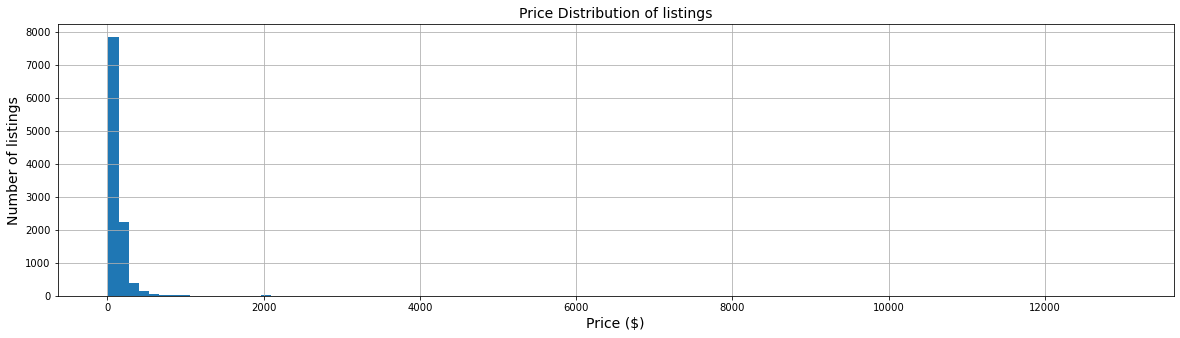

In [7]:
# Distribution of prices 
plt.figure(figsize=(20,5))
df.price.hist(bins=100)
plt.title("Price Distribution of listings", fontsize=14)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Number of listings", fontsize=14)
plt.show()

In [8]:
#Number of listings charging less than $50 
print(f"Number of listings charging less then $50 per night = {sum(df['price']<50)}")

Number of listings charging less then $50 per night = 1746


In [9]:
#Number of listings charging greater than $2000 
print(f"Number of listings charging less then $50 per night = {sum(df['price']>2000)}")

Number of listings charging less then $50 per night = 19


## Median price of Airbnbs accommodating different number of guests¶

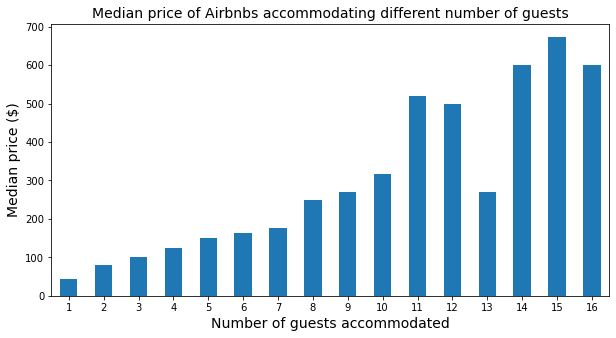

In [10]:
# Median price of Airbnbs accommodating different number of guests
plt.figure(figsize=(10,5))
df.groupby('accommodates')['price'].median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

## How price varies with people accommodated, bathrooms, bedrooms and beds¶

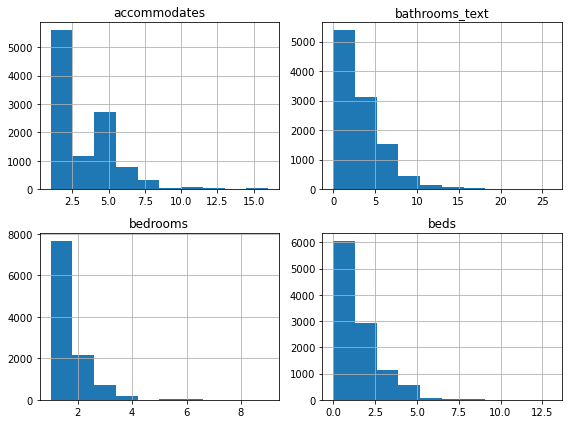

In [14]:
df[['accommodates', 'bathrooms_text', 'bedrooms', 'beds']].hist(figsize=(8,6));
plt.tight_layout()

In [15]:
df.head()

,price,log_price,bedrooms,review_scores_rating,review_scores_checkin,bathrooms_text,reviews_per_month,has_availability,availability_365,latitude,host_response_time,host_is_superhost,review_scores_accuracy,number_of_reviews_ltm,minimum_nights,longitude,availability_60,availability_30,neighbourhood_cleansed,maximum_nights,property_type,review_scores_cleanliness,accommodates,beds,review_scores_value,instant_bookable,availability_90,room_type
0,469.0,6.150603,5.0,100.0,10.0,11,0.10,True,0,43.64590,1,False,10.0,0,28,-79.42423,0,0,71,730,14,10.0,10,7.0,10.0,False,0,0
1,94.0,4.543295,1.0,97.0,10.0,5,1.19,True,365,43.64080,0,False,10.0,0,180,-79.37673,60,30,122,365,21,10.0,2,1.0,10.0,True,90,2
2,72.0,4.276666,1.0,95.0,10.0,4,1.64,True,365,43.69805,1,False,10.0,0,28,-79.45411,60,30,15,28,36,10.0,3,1.0,10.0,True,90,2
3,100.0,4.605170,2.0,93.0,10.0,2,0.86,True,283,43.63539,4,False,9.0,2,30,-79.44010,0,0,109,365,14,9.0,5,2.0,9.0,False,8,0
4,93.0,4.532599,2.0,99.0,10.0,3,0.60,True,363,43.74922,3,False,10.0,1,2,-79.29188,58,28,128,60,24,10.0,4,2.0,10.0,False,88,2


## Beds vs Accommodates¶

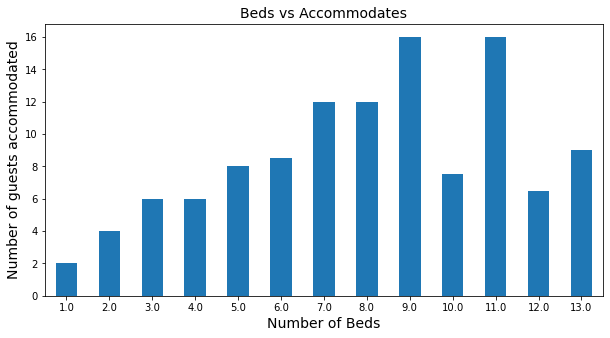

In [16]:
# Beds vs Accommodates
plt.figure(figsize=(10,5))
df.groupby('beds')['accommodates'].median().plot(kind='bar')
plt.title('Beds vs Accommodates', fontsize=14)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Number of guests accommodated', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()